There is an `m x n` grid with a ball. The ball is initially at the position `[startRow, startColumn]`. You are allowed to move the ball to one of the four adjacent cells in the grid (possibly out of the grid crossing the grid boundary). You can apply **at most** `maxMove` moves to the ball.

Given the five integers `m`, `n`, `maxMove`, `startRow`, `startColumn`, return the number of paths to move the ball out of the grid boundary. Since the answer can be very large, return it **modulo** **10<sup>9</sup> + 7**.

<br>

**Example 1:**

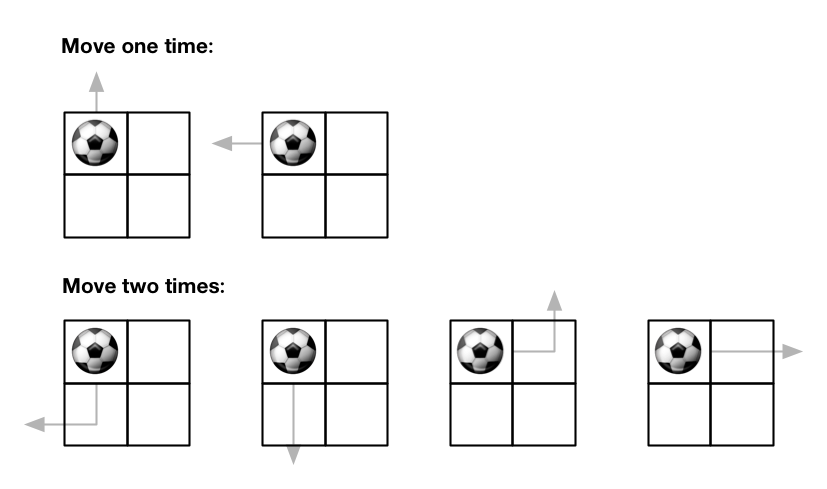

>**Input:** m = 2, n = 2, maxMove = 2, startRow = 0, startColumn = 0<br>
>**Output:** 6


**Example 2:**

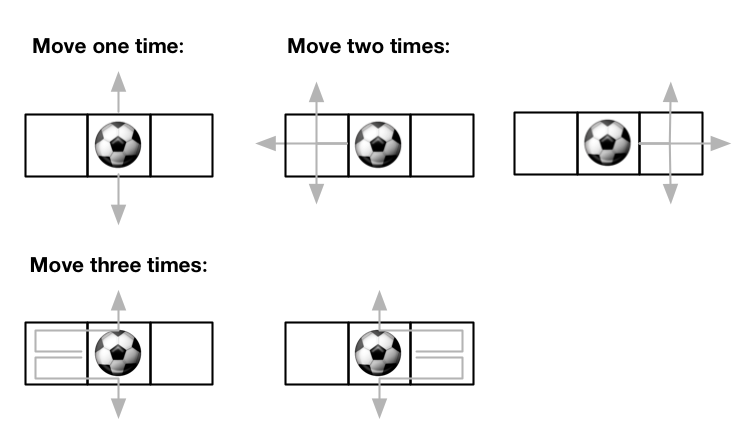

>**Input:** m = 1, n = 3, maxMove = 3, startRow = 0, startColumn = 1<br>
>**Output:** 12
 
<br>

**Constraints:**
- >1 <= m, n <= 50
- >0 <= maxMove <= 50
- >0 <= startRow < m
- >0 <= startColumn < n

In [1]:
class Solution:
    def findPaths(self, m: int, n: int, maxMove: int, startRow: int, startColumn: int) -> int:
        MOD = 10 ** 9 + 7

        dp = [[[0] * (maxMove + 1) for _ in range(n)] for _ in range(m)]
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        dp[startRow][startColumn][0] = 1
        result = 0

        for moves in range(1, maxMove + 1):
            for i in range(m):
                for j in range(n):
                    for d in directions:
                        ni, nj = i + d[0], j + d[1]

                        if 0 <= ni < m and 0 <= nj < n:
                            dp[i][j][moves] = (dp[i][j][moves] + dp[ni][nj][moves - 1]) % MOD
                        else:
                            result = (result + dp[i][j][moves - 1]) % MOD
        
        return result